## Dirichlet distribution

In [1]:
import random

def dirichlet_sample(alpha):
    # Generate gamma-distributed random variables
    gammas = [random.gammavariate(a, 1) for a in alpha]
    
    # Compute the sum of gamma variables
    gamma_sum = sum(gammas)
    
    # Normalize to obtain Dirichlet samples
    dirichlet_samples = [gamma / gamma_sum for gamma in gammas]
    
    return dirichlet_samples

# Set the concentration parameters
alpha = [1, 1, 1]  # Example parameters for a Dirichlet distribution with 3 components

# Generate random samples from the Dirichlet distribution
samples = [dirichlet_sample(alpha) for _ in range(10)]

print(samples)

[[0.24016739299928158, 0.25143127217457395, 0.5084013348261446], [0.0901024054421242, 0.18445422552834012, 0.7254433690295357], [0.0929152419877443, 0.7416804046170425, 0.16540435339521303], [0.039563052357497984, 0.9155882028624494, 0.04484874478005277], [0.02766269929280141, 0.9577166400844723, 0.014620660622726295], [0.8275562024932838, 0.03703586514087346, 0.13540793236584286], [0.454455235463064, 0.14345004171548714, 0.4020947228214489], [0.820013343037445, 0.13686891741344373, 0.043117739549111224], [0.12296612285245317, 0.7557315631609421, 0.12130231398660468], [0.18936037411315434, 0.39146107254857804, 0.41917855333826765]]


The Dirichlet distribution is a multivariate probability distribution defined on a fixed-dimensional simplex. It is often used as a prior distribution for modeling proportions or probabilities over multiple categories. The Dirichlet distribution takes a set of concentration parameters (α_1, α_2, ..., α_k) as input, where k is the number of categories or components. It generates random vectors (θ_1, θ_2, ..., θ_k) representing the proportions or probabilities of each category. The Dirichlet distribution has a well-defined probability density function (PDF), allowing us to compute the likelihood of observing specific proportions.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# Set the concentration parameters
alpha = [1, 2, 3]  # Example parameters for a Dirichlet distribution with 3 components

# Define the Dirichlet distribution
dist = dirichlet(alpha)

# Generate a grid of points in the simplex
resolution = 0.01
x = np.arange(0, 1 + resolution, resolution)
y = np.arange(0, 1 + resolution, resolution)
X, Y = np.meshgrid(x, y)

# Compute the PDF for each point in the grid
Z = dist.pdf(np.stack((X.flatten(), Y.flatten()), axis=1))
Z = Z.reshape(X.shape)

# Plot the PDF
plt.contourf(X, Y, Z, levels=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('PDF of Dirichlet Distribution')
plt.colorbar()
plt.show()

/home/ines/miniconda3/envs/glmhmm/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ines/miniconda3/envs/glmhmm/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ines/miniconda3/envs/glmhmm/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


ValueError: Vector 'x' must have either the same number of entries as, or one entry fewer than, parameter vector 'a', but alpha.shape = (3,) and x.shape = (10201, 2).

## Dirichlet process

The Dirichlet process is a stochastic process that defines a distribution over probability measures. It is used as a prior in Bayesian nonparametric modeling, allowing for infinite-dimensional parameter spaces. The Dirichlet process is characterized by two parameters: a base distribution (often called the "base measure") and a concentration parameter (often denoted as α). The base distribution represents the probability distribution from which the samples are drawn, while the concentration parameter controls the concentration or "stickiness" of the process. The Dirichlet process does not have a fixed-dimensional representation like the Dirichlet distribution. Instead, it defines a distribution over distributions, allowing for the generation of an infinite number of random measures.

One key property of the Dirichlet process is its exchangeability, which means that the order of observations does not affect the distribution over the components. This property allows the Dirichlet process to model situations with an unknown or variable number of components, making it particularly useful in Bayesian nonparametric modeling.

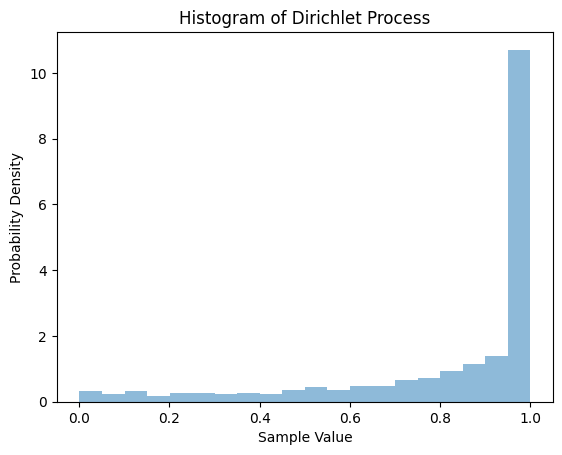

In [5]:
import matplotlib.pyplot as plt
import random

def dirichlet_process(alpha, num_samples):
    # Generate samples from the Dirichlet process
    samples = []
    for _ in range(num_samples):
        beta = random.betavariate(1, alpha)
        samples.append(beta)

    return samples

# Set the concentration parameter
alpha = .2

# Generate Dirichlet process samples
num_samples = 1000
samples = dirichlet_process(alpha, num_samples)

# Plot the histogram
plt.hist(samples, bins=20, density=True, alpha=0.5)
plt.xlabel('Sample Value')
plt.ylabel('Probability Density')
plt.title('Histogram of Dirichlet Process')
plt.show()

### Stick breaking construction

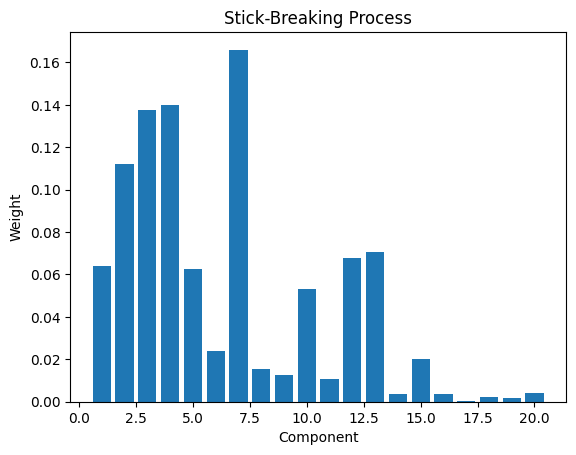

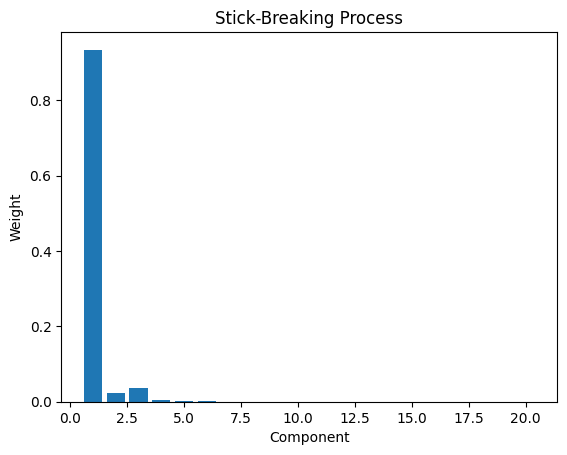

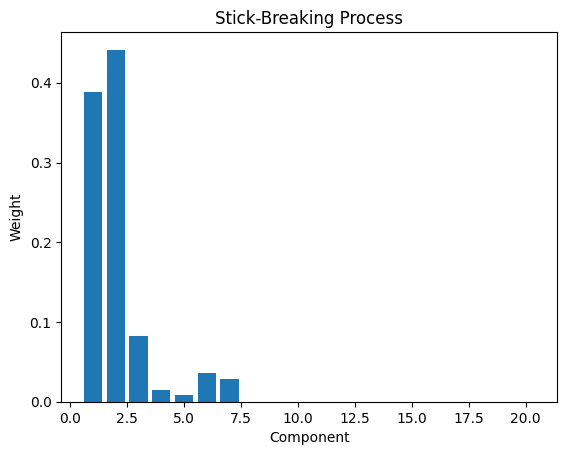

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def stick_breaking(concentration, num_components):
    remaining_stick = 1.0
    betas = np.random.beta(1, concentration, num_components)
    weights = []

    for beta in betas:
        weight = beta * remaining_stick
        weights.append(weight)
        remaining_stick -= weight

    return weights

concentration = 5.0
num_components = 20

weights = stick_breaking(concentration, num_components)

# Plotting the stick-breaking process
plt.bar(range(1, num_components+1), weights, align='center')
plt.xlabel('Component')
plt.ylabel('Weight')
plt.title('Stick-Breaking Process')
plt.show()



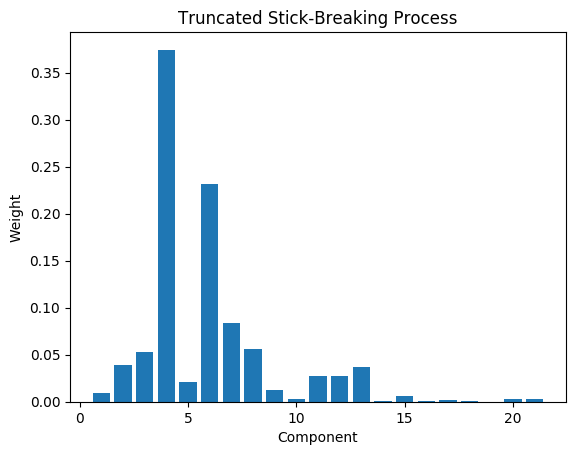

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def truncated_stick_breaking(concentration, threshold):
    remaining_stick = 1.0
    betas = []
    weights = []

    while remaining_stick > threshold:
        beta = np.random.beta(1, concentration)
        weight = beta * remaining_stick
        betas.append(beta)
        weights.append(weight)
        remaining_stick -= weight

    return weights

concentration = 5.0
threshold = 0.01  # Example threshold value

weights = truncated_stick_breaking(concentration, threshold)

# Plotting the truncated stick-breaking process
plt.bar(range(1, len(weights) + 1), weights, align='center')
plt.xlabel('Component')
plt.ylabel('Weight')
plt.title('Truncated Stick-Breaking Process')
plt.show()

In this code, we define a function dirichlet_process_sampling that performs Dirichlet process sampling using a base distribution. In this case, the base distribution is a Gaussian distribution parameterized by a mean mu and a standard deviation sigma.

The function takes the concentration parameter alpha, the base distribution, and the number of samples as input. It generates stick-breaking weights using the beta distribution, then iteratively assigns samples to clusters based on the weights and the base distribution's probability density function.

Finally, we set the parameters alpha, num_samples, and the base distribution (Gaussian) with mean mu and standard deviation sigma. We call the dirichlet_process_sampling function to sample from the Dirichlet process and print the resulting cluster assignments.

Please note that this code is a simplified implementation for illustrative purposes. In practice, more efficient and specialized algorithms, such as the Chinese Restaurant Process or the Stick Breaking Process, are commonly used for sampling from a Dirichlet process.

Cluster assignments:
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0]


(array([56.,  0.,  0., 37.,  0.,  0.,  6.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

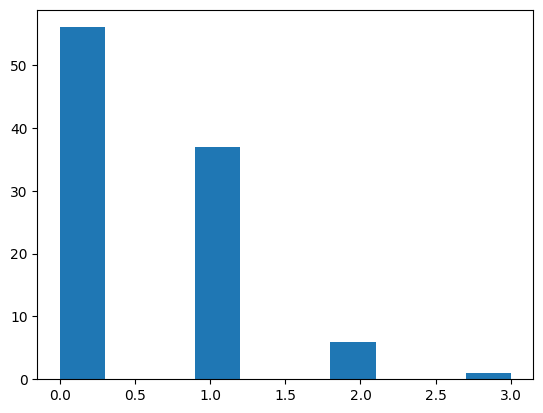

In [11]:
import numpy as np
from scipy.stats import norm

def dirichlet_process_sampling(alpha, base_distribution, num_samples):
    # Generate stick-breaking weights
    beta = np.random.beta(1, alpha, size=num_samples)
    weights = np.concatenate(([beta[0]], np.diff(beta)))

    # Generate cluster assignments
    cluster_assignments = []
    for i in range(num_samples):
        assignments = np.arange(len(cluster_assignments) + 1)
        if i > 0:
            assignments = np.append(assignments, cluster_assignments[-1])

        prob = weights[i] * base_distribution.pdf(assignments)
        prob /= np.sum(prob)

        cluster = np.random.choice(assignments, p=prob)
        cluster_assignments.append(cluster)

    return cluster_assignments

# Parameters
alpha = 1.0  # Concentration parameter
num_samples = 100  # Number of samples

# Base distribution (Gaussian)
mu = 0.0  # Mean
sigma = 1.0  # Standard deviation
base_distribution = norm(mu, sigma)

# Sample from the Dirichlet process
samples = dirichlet_process_sampling(alpha, base_distribution, num_samples)

# Print the cluster assignments
print("Cluster assignments:")
print(samples)

plt.hist(samples)


Now using the Chinese Restaurant process

Table assignments:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

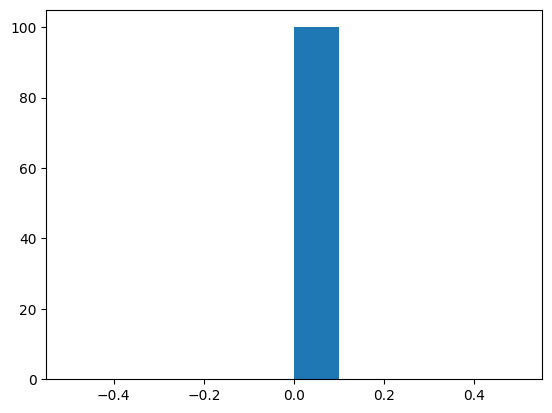

In [9]:
import numpy as np

def chinese_restaurant_process(alpha, num_samples):
    # Initialize the first customer to sit at the first table
    table_assignments = [0]

    for i in range(1, num_samples):
        # Calculate the probability of sitting at each existing table
        table_probabilities = np.bincount(table_assignments) / (i + alpha)

        # Calculate the probability of sitting at a new table
        new_table_probability = alpha / (i + alpha)

        # Combine the probabilities of sitting at existing and new tables
        probabilities = np.concatenate((table_probabilities, [new_table_probability]))

        # Sample a table assignment based on the probabilities
        table = np.random.choice(len(probabilities), p=probabilities)

        # Assign the customer to the chosen table
        table_assignments.append(table)

    return table_assignments

# Parameters
alpha = 1.0  # Concentration parameter
num_samples = 100  # Number of samples

# Sample from the Dirichlet process using the Chinese Restaurant Process
samples = chinese_restaurant_process(alpha, num_samples)

# Print the table assignments
print("Table assignments:")
print(samples)

plt.hist(samples)

### Gibbs sampling

- MCMC methods are based on the concept of constructing a Markov chain that converges to the desired probability distribution. Markov chains are stochastic processes where the future state depends only on the current state, not the past states. The idea behind MCMC is to design a Markov chain that has the desired distribution as its equilibrium distribution, meaning that after a sufficient number of steps, the chain will converge to sampling from the desired distribution.
- Usually sampling from the joint distribution is very difficult but from the joint is not as hard

In [36]:
import numpy as np

def gibbs_sampling(num_samples, initial_values, cov_matrix):
    # Initialize variables
    x = initial_values[0]
    y = initial_values[1]
    samples = np.zeros((num_samples, 2))

    for i in range(num_samples):
        # Sample x given y
        x = np.random.normal(cov_matrix[0, 1] / cov_matrix[1, 1] * (y - cov_matrix[1, 0]) + cov_matrix[0, 0], 
                             np.sqrt(cov_matrix[0, 0] - cov_matrix[0, 1] / cov_matrix[1, 1] * cov_matrix[1, 0]))

        # Sample y given x
        y = np.random.normal(cov_matrix[1, 0] / cov_matrix[0, 0] * (x - cov_matrix[0, 1]) + cov_matrix[1, 1], 
                             np.sqrt(cov_matrix[1, 1] - cov_matrix[1, 0] / cov_matrix[0, 0] * cov_matrix[0, 1]))

        # Store the samples
        samples[i, 0] = x
        samples[i, 1] = y

    return samples

# Define parameters
num_samples = 1000
initial_values = [0, 0]
cov_matrix = np.array([[1, 0.5], [0.5, 1]])

# Perform Gibbs sampling
samples = gibbs_sampling(num_samples, initial_values, cov_matrix)

# Print the samples
print(samples)

[[-0.59233389  0.54613178]
 [-0.5808625  -0.6004708 ]
 [ 0.69557289  0.34380877]
 ...
 [ 2.22584978  1.07397728]
 [ 1.13908376  2.06619414]
 [ 2.88441155  2.17917805]]


In [12]:
import numpy as np
from scipy.stats import multivariate_normal

# Set hyperparameters
alpha = 1.0  # Concentration parameter of the Dirichlet process
mu_0 = np.array([0, 0])  # Mean of the base Gaussian distribution
sigma_0 = np.eye(2)  # Covariance matrix of the base Gaussian distribution

# Generate or load the dataset
dataset = np.array([[1, 2], [3, 4], [1, 1], [5, 5], [6, 6], [2, 2]])

# Initialize variables
num_data = dataset.shape[0]
cluster_assignments = np.zeros(num_data, dtype=int)
cluster_params = []
num_clusters = 0

# Initialization
for i in range(num_data):
    # Assign each data point to a new cluster
    cluster_assignments[i] = num_clusters
    num_clusters += 1
    cluster_params.append(multivariate_normal.rvs(mean=mu_0, cov=sigma_0))

# Gibbs Sampling
num_iterations = 100
for iteration in range(num_iterations):
    for i in range(num_data):
        # Remove i from its current cluster
        cluster = cluster_assignments[i]
        cluster_size = np.sum(cluster_assignments == cluster)
        
        # If the cluster becomes empty, remove it
        if cluster_size == 1:
            cluster_params.pop(cluster)
            num_clusters -= 1
        
        # Compute the probability of assigning i to existing clusters
        p_existing_cluster = cluster_size / (num_data - 1 + alpha)
        
        # Compute the probability of creating a new cluster
        p_new_cluster = alpha / (num_data - 1 + alpha)
        
        # Sample a new cluster assignment for data point i
        if np.random.rand() < p_new_cluster:
            # Create a new cluster
            cluster_assignments[i] = num_clusters
            num_clusters += 1
            cluster_params.append(multivariate_normal.rvs(mean=mu_0, cov=sigma_0))
        else:
            # Assign to an existing cluster
            cluster_assignments[i] = np.random.choice(np.arange(num_clusters), p_existing_cluster)
    
    for cluster in range(num_clusters):
        # Gather all data points assigned to the cluster
        cluster_data = dataset[cluster_assignments == cluster]
        
        # Update cluster parameters using the base distribution
        cluster_mean = np.mean(cluster_data, axis=0)
        cluster_cov = np.cov(cluster_data.T)
        
        # Sample new cluster parameters from the Gaussian base distribution
        cluster_params[cluster] = multivariate_normal.rvs(mean=cluster_mean, cov=cluster_cov)
    
    # Optionally, update hyperparameters (e.g., alpha)
    # Update alpha based on your specific application or prior knowledge
    
    # Collect samples or perform desired analysis
    
# After sufficient iterations, use the collected samples for analysis or inference

TypeError: expected a sequence of integers or a single integer, got '0.16666666666666666'